In [0]:
import matplotlib.pyplot as plt
import torch as th

device = "cuda" if th.cuda.is_available() else "cpu"
print(device)

cuda


In [0]:
a = th.tensor([2.0], requires_grad=True).to(device)
b = th.tensor([3.0], requires_grad=True).to(device)
print(a, b)

def model0_u(t):
  return a * t * t + b

t = th.tensor([2.0, 3.0], requires_grad=True).to(device)
print(t)
u = model0_u(t)
print(u)
ut = th.autograd.grad([th.sum(u)], [t], create_graph=True, only_inputs=True)[0]
print(ut)

tensor([2.], device='cuda:0', grad_fn=<CopyBackwards>) tensor([3.], device='cuda:0', grad_fn=<CopyBackwards>)
tensor([2., 3.], device='cuda:0', grad_fn=<CopyBackwards>)
tensor([11., 21.], device='cuda:0', grad_fn=<AddBackward0>)
tensor([ 8., 12.], device='cuda:0', grad_fn=<AddBackward0>)


In [0]:
# input shape [*, 1], output shape [*, 1]
model1 = th.nn.Sequential(
    th.nn.Linear(1, 1000),
    th.nn.ReLU(),
    th.nn.Linear(1000, 1)
).to(device)

def error1(t):
  u = model1(t)
  ut = th.autograd.grad([th.sum(u)], [t], create_graph=True, only_inputs=True)[0]
  e1 = (ut - u) ** 2
  e2 = (model1(th.tensor([0.0], device=device)) - 1.0) ** 2
  return e1 + e2

# t = th.rand([5, 1], requires_grad=True)
# print(t)
# print(error1(t))

In [0]:
  # input shape [*, 1], output shape [*, 1]
model1 = th.nn.Sequential(
    th.nn.Linear(1, 1000),
    th.nn.ReLU(),
    th.nn.Linear(1000, 1)
).to(device)

def error1(t):
  u = model1(t)
  ut = th.autograd.grad([th.sum(u)], [t], create_graph=True, only_inputs=True)[0]
  w=th.exp(t)
  e1 = w * (ut - u) ** 2
  e2 = w * (model1(th.tensor([0.0], device=device)) - 1.0) ** 2
  return e1 + e2

# t = th.rand([5, 1], requires_grad=True)
# print(t)
# print(error1(t))

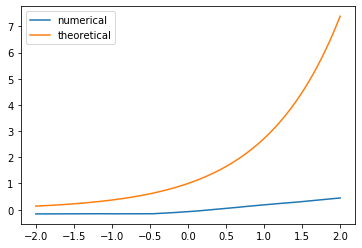

In [0]:
def plot1(start=-2.0, end=2.0):
  t = th.arange(1001.0).to(device) / 1000 * (end - start) + start
  u = model1(t.unsqueeze(1)).squeeze(1)
  plt.plot(t.detach().cpu().numpy(), u.detach().cpu().numpy(), label="numerical")
  plt.plot(t.detach().cpu().numpy(), th.exp(t).detach().cpu().numpy(), label="theoretical")
  plt.legend()
  plt.show()

plot1()

500 0.6164329648017883
1000 0.502188503742218
1500 0.4061051607131958
2000 0.3759474754333496
2500 0.36281818151474
3000 0.3397136330604553
3500 0.32504215836524963
4000 0.3040604293346405
4500 0.2750381827354431
5000 0.26046374440193176
5500 0.2291622757911682
6000 0.20739133656024933
6500 0.17856156826019287
7000 0.17010380327701569
7500 0.15038910508155823
8000 0.13025471568107605
8500 0.10539522022008896
9000 0.08793724328279495
9500 0.08710785210132599
10000 0.06982357800006866


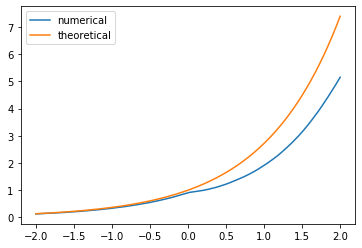

In [0]:
def optim1(batch=1000, lr=1e-5, steps=10000):
  opt = th.optim.Adam(model1.parameters(), lr=lr)

  for step in range(1, steps + 1):
    opt.zero_grad()

    # evaluate at random places in the [-2, 2] interval
    t = th.rand([batch, 1], requires_grad=True, device=device) * 4 - 2
    loss = th.mean(error1(t))

    if step % 500 == 0:
      print(step, loss.item())
    
    loss.backward()
    opt.step()

optim1()
plot1()

In [0]:
model2 = th.nn.Sequential(
    th.nn.Linear(1, 100),
    th.nn.ReLU(),
    th.nn.Linear(100, 100),
    th.nn.ReLU(),
    th.nn.Linear(100, 1)
).to(device)

def error2(t):
  u = model2(t)
  ut = th.autograd.grad([th.sum(u)], [t], create_graph=True, only_inputs=True)[0]
  e1 =100*(ut - 2*u * (1 - u)) *(ut - 2*u * (1 - u)) 
  e2 = (model2(th.tensor([0.0], device=device)) - 0.5) ** 2
  return e1 + e2


In [0]:
model2 = th.nn.Sequential(
    th.nn.Linear(1, 100),
    th.nn.ReLU(),
    th.nn.Linear(100, 100),
    th.nn.ReLU(),
    th.nn.Linear(100, 1)
).to(device)

def error2(t):
  u = model2(t)
  ut = th.autograd.grad([th.sum(u)], [t], create_graph=True, only_inputs=True)[0]
  w = th.exp(t)
  e1 = w * (ut - 2*u * (1 - u)) *(ut - 2*u * (1 - u))
  e2 = w * (model2(th.tensor([0.0], device=device)) - 0.5) ** 2
  return e1 + e2


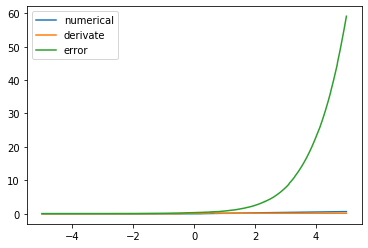

In [0]:
def plot2(start=-5.0, end=5.0):
  def np(x):
    return x.detach().cpu().squeeze(1).numpy()
  t = th.arange(1001.0, requires_grad=True).unsqueeze(1).to(device) / 1000 * (end - start) + start
  u = model2(t)
  ut = th.autograd.grad([th.sum(u)], [t], create_graph=True, only_inputs=True)[0]
  e = error2(t)
  plt.plot(np(t), np(u), label="numerical")
  plt.plot(np(t), np(ut), label="derivate")
  plt.plot(np(t), np(e), label="error")
  plt.legend()
  plt.show()

plot2()

1000 0.002618581522256136
2000 0.001510118250735104
3000 0.0015514632686972618
4000 0.0015059540746733546
5000 0.0009554857388138771
6000 0.0007812527474015951
7000 0.0007064120727591217
8000 0.0009616559837013483
9000 0.000988819170743227
10000 0.000922934734262526


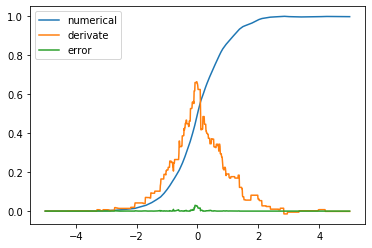

In [0]:
def optim2(batch=1000, lr=1e-6, steps=10000):
  opt = th.optim.Adam(model2.parameters(), lr=lr)

  for step in range(1, steps + 1):
    opt.zero_grad()

    # evaluate at random places in the [-5, 5] interval
    t = th.rand([batch, 1], requires_grad=True, device=device) * 10 - 5
    loss = th.mean(error2(t))

    if step % 1000 == 0:
      print(step, loss.item())
    
    loss.backward()
    opt.step()

optim2()
plot2()

In [0]:
def error2(t):
  u = model2(t)
  ut = th.autograd.grad([th.sum(u)], [t], create_graph=True, only_inputs=True)[0]
  w = th.exp(-t)
  e1 = w * (ut - 2*u * (1 - u)) *(ut - 2*u * (1 - u))
  e2 = w * (model2(th.tensor([0.0], device=device)) - 0.5) ** 2
  return e1 + e2